In [1]:
from google.colab import files
import pandas as pd

# Upload the CSV file
uploaded = files.upload()

Saving spam.csv to spam.csv


In [10]:
# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin1')

# Display the first few rows of the dataframe
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [12]:
# Drop unnecessary columns
df = df[['v1', 'v2']]

# Rename columns for convenience
df.columns = ['label', 'message']

# Encode the labels: 'spam' -> 1, 'ham' -> 0
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

<ipython-input-12-f40901fbba71>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'] = df['label'].map({'ham': 0, 'spam': 1})


In [13]:
# Check the cleaned data
print(df.head())

   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [14]:
# Split the data into features and target
X = df['message']
y = df['label']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [16]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [17]:
# Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)
y_pred_nb = nb_classifier.predict(X_test_tfidf)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_nb))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1453
           1       1.00      0.75      0.86       219

    accuracy                           0.97      1672
   macro avg       0.98      0.88      0.92      1672
weighted avg       0.97      0.97      0.97      1672



In [18]:
# Logistic Regression
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)
y_pred_lr = lr_classifier.predict(X_test_tfidf)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1453
           1       0.98      0.65      0.78       219

    accuracy                           0.95      1672
   macro avg       0.96      0.83      0.88      1672
weighted avg       0.95      0.95      0.95      1672



In [19]:
# Support Vector Machines (SVM)
svm_classifier = SVC()
svm_classifier.fit(X_train_tfidf, y_train)
y_pred_svm = svm_classifier.predict(X_test_tfidf)
print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1453
           1       0.99      0.84      0.91       219

    accuracy                           0.98      1672
   macro avg       0.99      0.92      0.95      1672
weighted avg       0.98      0.98      0.98      1672



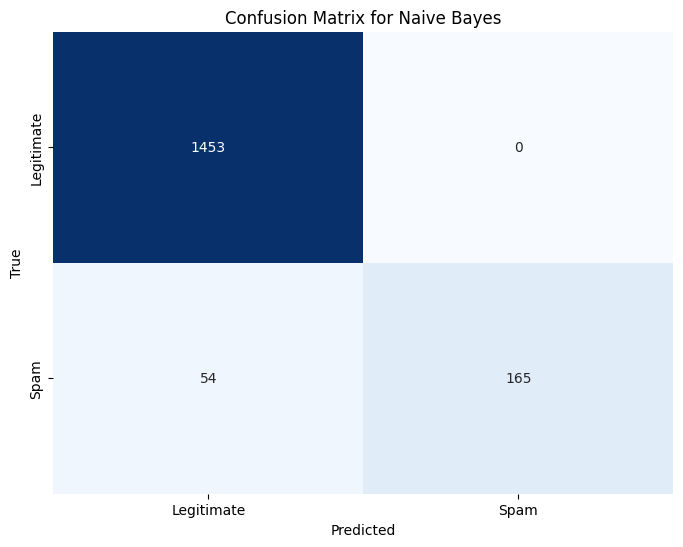

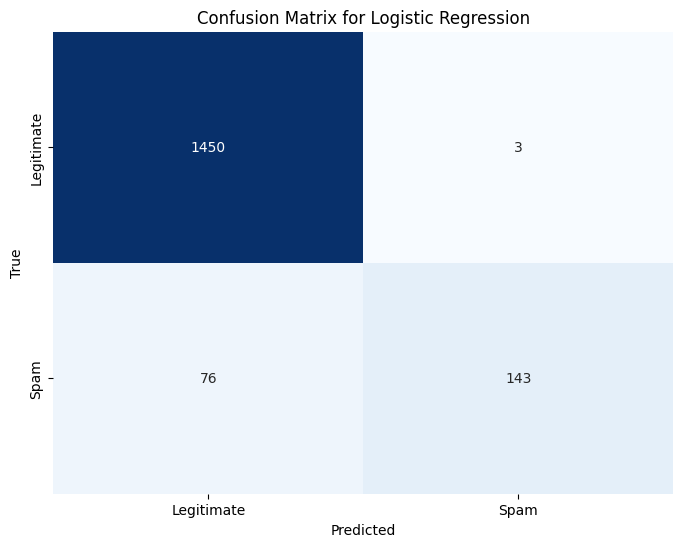

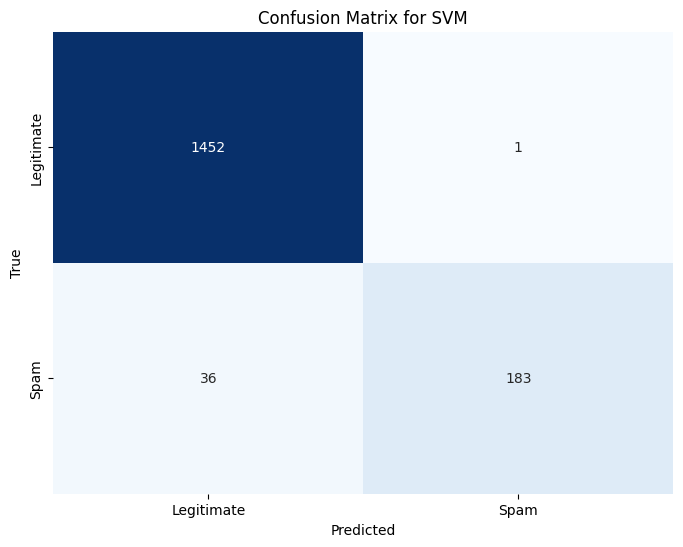

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Legitimate', 'Spam'], yticklabels=['Legitimate', 'Spam'])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(y_test, y_pred_nb, title='Confusion Matrix for Naive Bayes')

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, y_pred_lr, title='Confusion Matrix for Logistic Regression')

# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, y_pred_svm, title='Confusion Matrix for SVM')

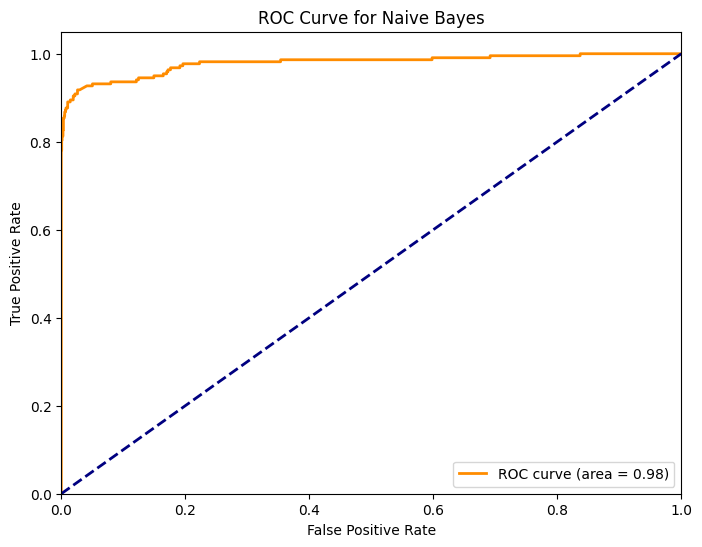

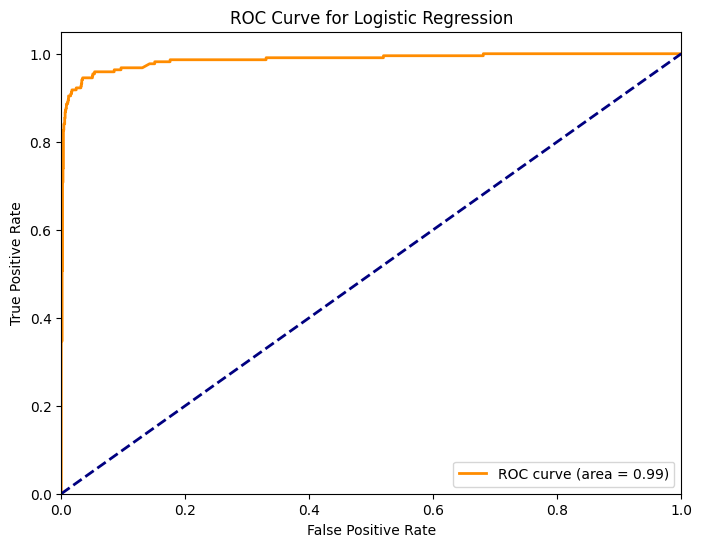

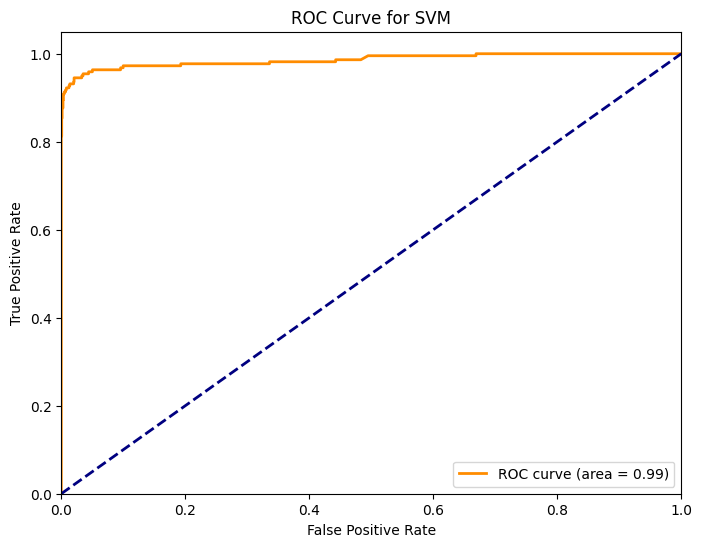

In [21]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(y_true, y_score, title='ROC Curve'):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc='lower right')
    plt.show()

# Calculate probabilities for ROC curve
y_score_nb = nb_classifier.predict_proba(X_test_tfidf)[:, 1]
y_score_lr = lr_classifier.predict_proba(X_test_tfidf)[:, 1]
y_score_svm = svm_classifier.decision_function(X_test_tfidf)

# Plot ROC curves
plot_roc_curve(y_test, y_score_nb, title='ROC Curve for Naive Bayes')
plot_roc_curve(y_test, y_score_lr, title='ROC Curve for Logistic Regression')
plot_roc_curve(y_test, y_score_svm, title='ROC Curve for SVM')

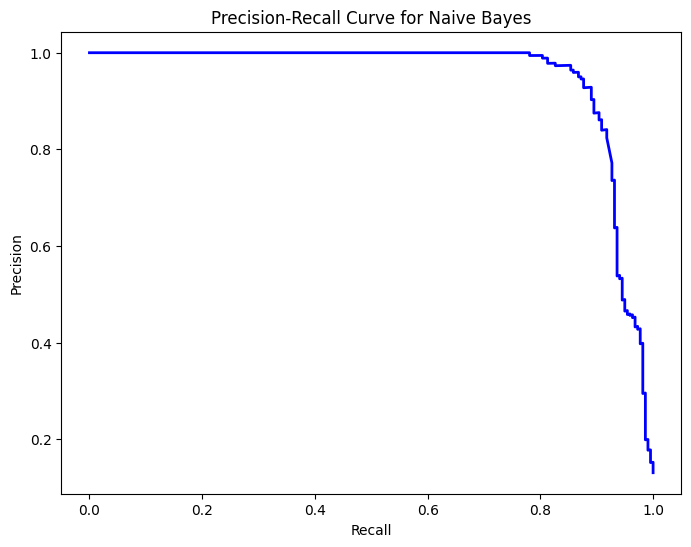

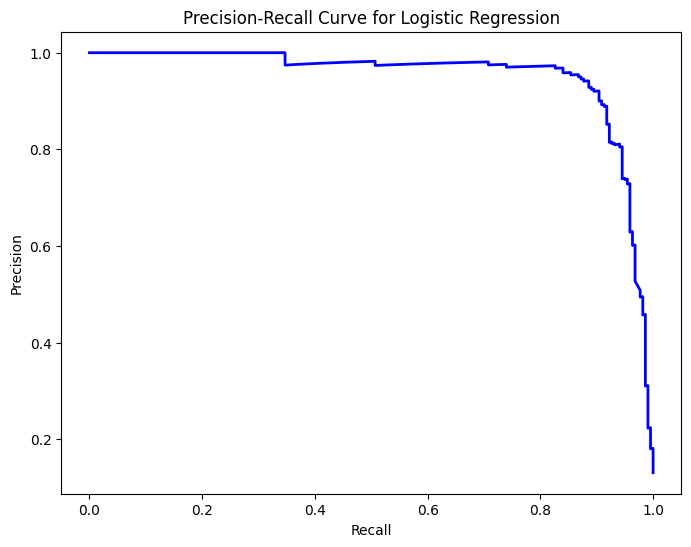

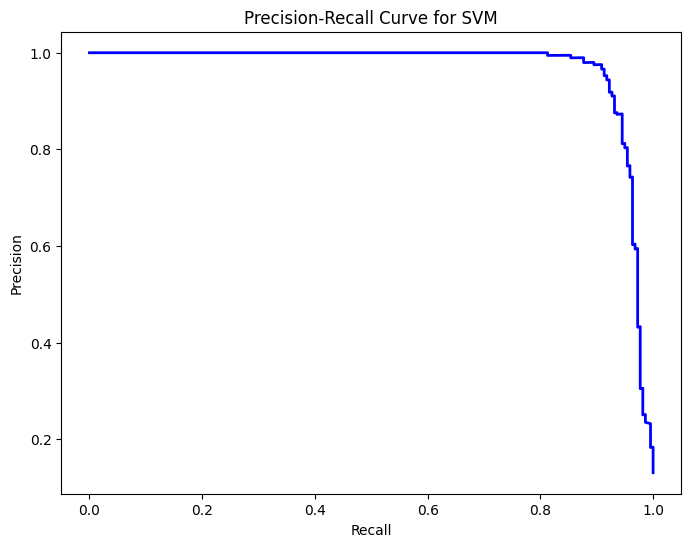

In [22]:
from sklearn.metrics import precision_recall_curve

# Function to plot Precision-Recall curve
def plot_precision_recall_curve(y_true, y_scores, title='Precision-Recall Curve'):
    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.show()

# Plot Precision-Recall curves
plot_precision_recall_curve(y_test, y_score_nb, title='Precision-Recall Curve for Naive Bayes')
plot_precision_recall_curve(y_test, y_score_lr, title='Precision-Recall Curve for Logistic Regression')
plot_precision_recall_curve(y_test, y_score_svm, title='Precision-Recall Curve for SVM')